In [21]:
import pandas as pd
import numpy as np
import matplotlib as mb
import seaborn as sb
import plotly as ply
import matplotlib.pyplot as plt

In [22]:
import xgboost
print(xgboost.__version__)


3.0.2


In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,precision_score

In [24]:
german_load = pd.read_csv("cleaned_germany_load_data.csv",parse_dates=['utc_timestamp'],index_col='utc_timestamp')
german_load.index.name = "Time"
german_load.head()

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual,Total_renewable_energy,hour,day,weekday,month,lag_1h,lag_24h
Time,,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,40577.0,38711.0,37250.0,0.0,0.0,27926.0,23434.0,0.8391,667.0,276.0,...,4591.0,0.0,71.0,23434.0,0,2,4,1,42424.0,41151.0
2015-01-02 01:00:00,39707.0,37820.0,37250.0,0.0,0.0,27926.0,24248.0,0.8683,667.0,282.0,...,4419.0,0.0,92.0,24248.0,1,2,4,1,40577.0,40135.0
2015-01-02 02:00:00,39504.0,37828.0,37250.0,0.0,0.0,27926.0,25034.0,0.8964,667.0,325.0,...,4315.0,0.0,108.0,25034.0,2,2,4,1,39707.0,39106.0
2015-01-02 03:00:00,40391.0,38925.0,37250.0,0.0,0.0,27926.0,25721.0,0.9210,667.0,335.0,...,4401.0,0.0,133.0,25721.0,3,2,4,1,39504.0,38765.0
2015-01-02 04:00:00,42382.0,40503.0,37250.0,0.0,0.0,27926.0,26172.0,0.9372,667.0,388.0,...,4318.0,0.0,166.0,26172.0,4,2,4,1,40391.0,38941.0


In [25]:
features = [
    'hour', 'day', 'weekday', 'month',
    'lag_1h', 'lag_24h'
]

X = german_load[features]
y = german_load['DE_load_actual_entsoe_transparency']
y.head()

Time
2015-01-02 00:00:00    40577.0
2015-01-02 01:00:00    39707.0
2015-01-02 02:00:00    39504.0
2015-01-02 03:00:00    40391.0
2015-01-02 04:00:00    42382.0
Name: DE_load_actual_entsoe_transparency, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False) 
# Important: no shuffle for time series!


In [27]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")


MAE: 604.80 MW
RMSE: 821.51 MW


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9915


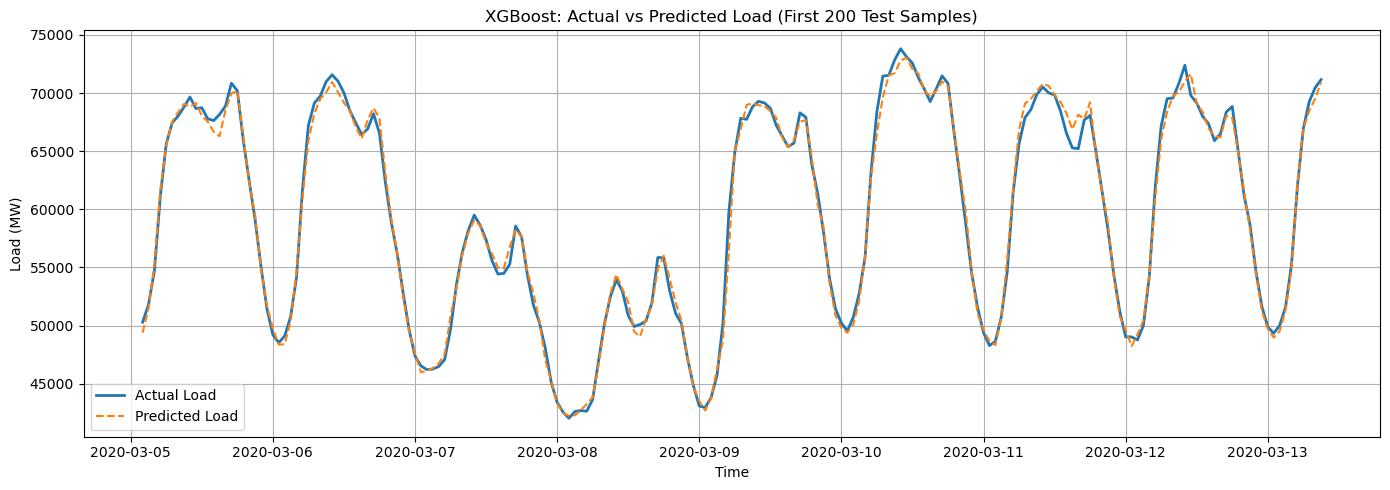

In [30]:
plt.figure(figsize=(14,5))
plt.plot(y_test.index[:200], y_test[:200], label="Actual Load", linewidth=2)
plt.plot(y_test.index[:200], y_pred[:200], label="Predicted Load", linestyle="--")
plt.title("XGBoost: Actual vs Predicted Load (First 200 Test Samples)")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


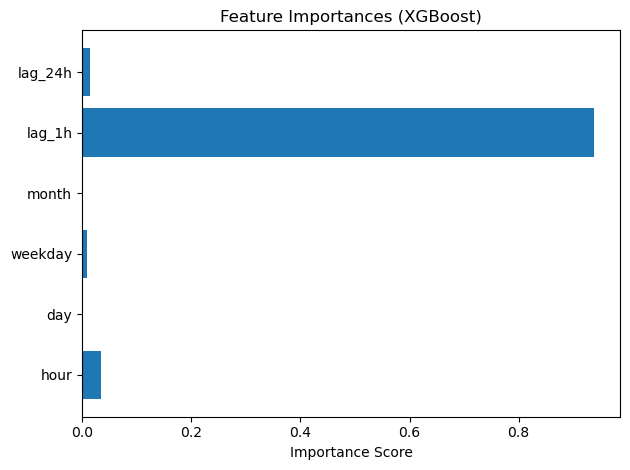

In [31]:
importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [32]:
from datetime import timedelta

last_timestamp = german_load.index.max()
future_dates = pd.date_range(start=last_timestamp + timedelta(hours=1), periods=168, freq='H')  # next 7 days
print(last_timestamp)

2020-09-30 23:00:00


In [33]:
first_timestamp = german_load.index.min()
print(first_timestamp)

2015-01-02 00:00:00


In [34]:
future_df = pd.DataFrame(index=future_dates)
future_df["hour"] = future_df.index.hour
future_df["day"] = future_df.index.day
future_df["weekday"] = future_df.index.weekday
future_df["month"] = future_df.index.month


In [35]:
# Get last known values
future_df["lag_1h"] = german_load["DE_load_actual_entsoe_transparency"].iloc[-1]
future_df["lag_24h"] = german_load["DE_load_actual_entsoe_transparency"].iloc[-24] if len(german_load) >= 24 else df_de["DE_load_actual_entsoe_transparency"].mean()


In [36]:
future_X = future_df[features]  # Ensure columns match training features
future_df["Predicted_Load"] = model.predict(future_X)


In [37]:
import joblib
joblib.dump(model, 'xgb_load_forecast_model.pkl')


['xgb_load_forecast_model.pkl']

In [38]:
import pandas as pd

results = X_test.copy()
results["Actual_Load"] = y_test
results["Predicted_Load"] = y_pred

results.to_csv("test_predictions.csv")
future_df.to_csv("future_prediction.csv")


In [39]:
print(type(model))

<class 'xgboost.sklearn.XGBRegressor'>
